Analyze the results from `analysis.py`

Author: Daniel Fu
Updated: 2/18/2024

In [1]:
# Import necessary packages
from g4beam import *
from scan import *

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import numpy as np
import pandas as pd
import pickle
from tabulate import tabulate
import lzma

# Import the scan ranges to make sure we're using the right ranges in making graphs
from accuracy import particleCountRange, maxStepRange, wedgeStepRange, particleCountOptimRange

# Particle Count

In [2]:
# Load file and apply processing.
with lzma.open("results/accuracy_particleCount.pkl.lzma", "rb") as file:
    results = pickle.load(file)

results_cut = map_dict(lambda x: cut_outliers(x[0]), data_to_map(results))
results_emittances = map_dict(lambda x: emittances(x), results_cut)

Text(0.5, 0.98, 'Effects of particle count')

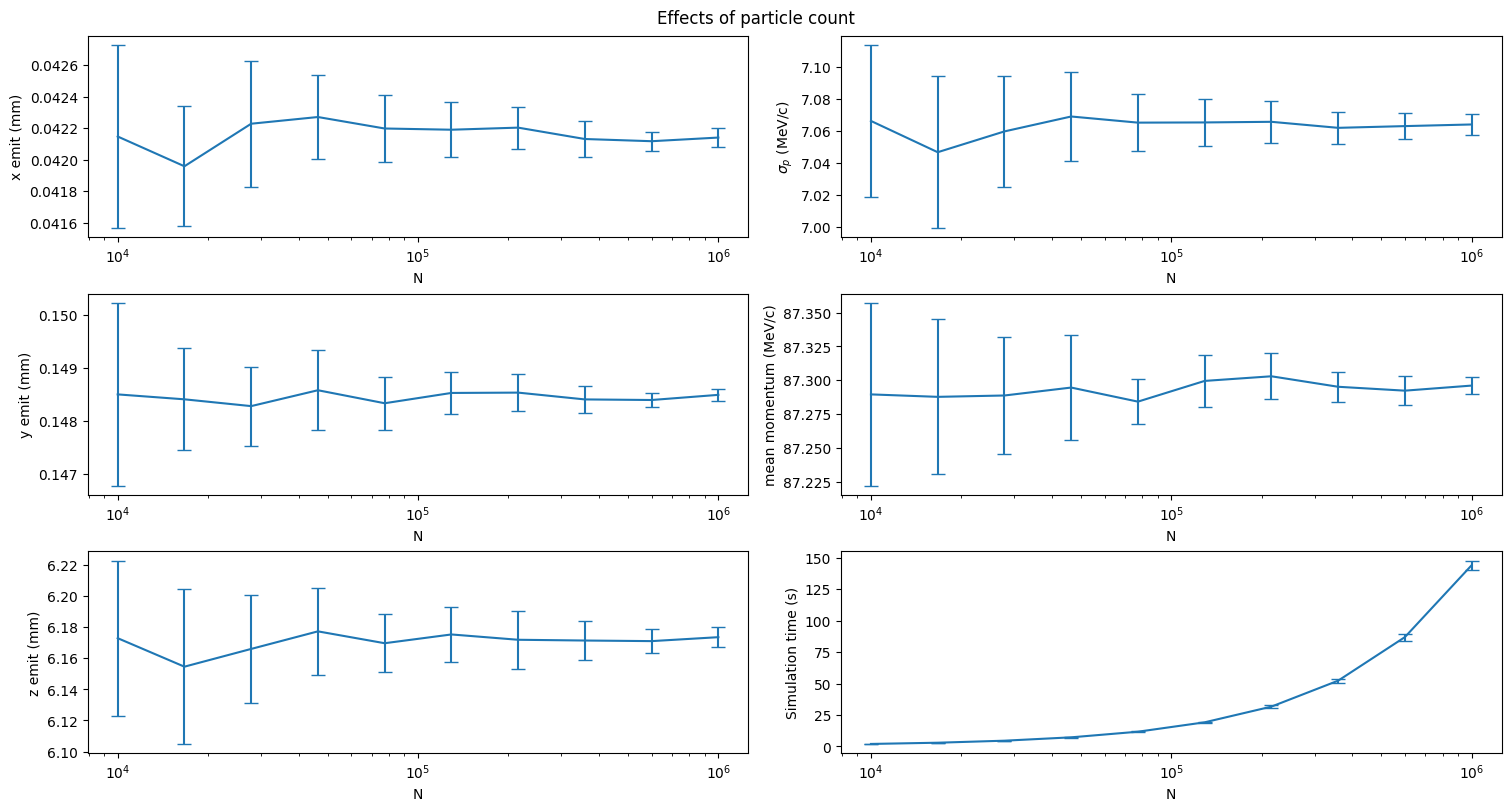

In [3]:
# Variables for the graphs
x_name = "N"
x_range = particleCountRange

# Produce graphs
fig, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(nrows=3, ncols=2, layout="constrained")
fig.set_size_inches(15, 8)
ax1.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[0], results_emittances, is_map=True)), capsize=5)
ax1.set_xlabel(x_name)
ax1.set_ylabel(r"x emit (mm)")
ax1.set_xscale("log")

ax2.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[1], results_emittances, is_map=True)), capsize=5)
ax2.set_xlabel(x_name)
ax2.set_ylabel(r"y emit (mm)")
ax2.set_xscale("log")

ax3.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[2], results_emittances, is_map=True)), capsize=5)
ax3.set_xlabel(x_name)
ax3.set_ylabel(r"z emit (mm)")
ax3.set_xscale("log")

ax4.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: np.std(p_total(x)), results_cut, is_map=True)), capsize=5)
ax4.set_xlabel(x_name)
ax4.set_ylabel(r"$\sigma_p$ (MeV/c)")
ax4.set_xscale("log")

ax5.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: np.mean(p_total(x)), results_cut, is_map=True)), capsize=5)
ax5.set_xlabel(x_name)
ax5.set_ylabel(r"mean momentum (MeV/c)")
ax5.set_xscale("log")

ax6.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[1], results)), capsize=5)
ax6.set_xlabel(x_name)
ax6.set_ylabel(r"Simulation time (s)")
ax6.set_xscale("log")

fig.suptitle("Effects of particle count")

# Max Step

In [5]:
# Load file and apply processing.
with lzma.open("results/accuracy_maxStep.pkl.lzma", "rb") as file:
    results = pickle.load(file)

results_cut = map_dict(lambda x: cut_outliers(x[0]), data_to_map(results))
results_emittances = map_dict(lambda x: emittances(x), results_cut)

Text(0.5, 0.98, 'Effects of max step in vacuum')

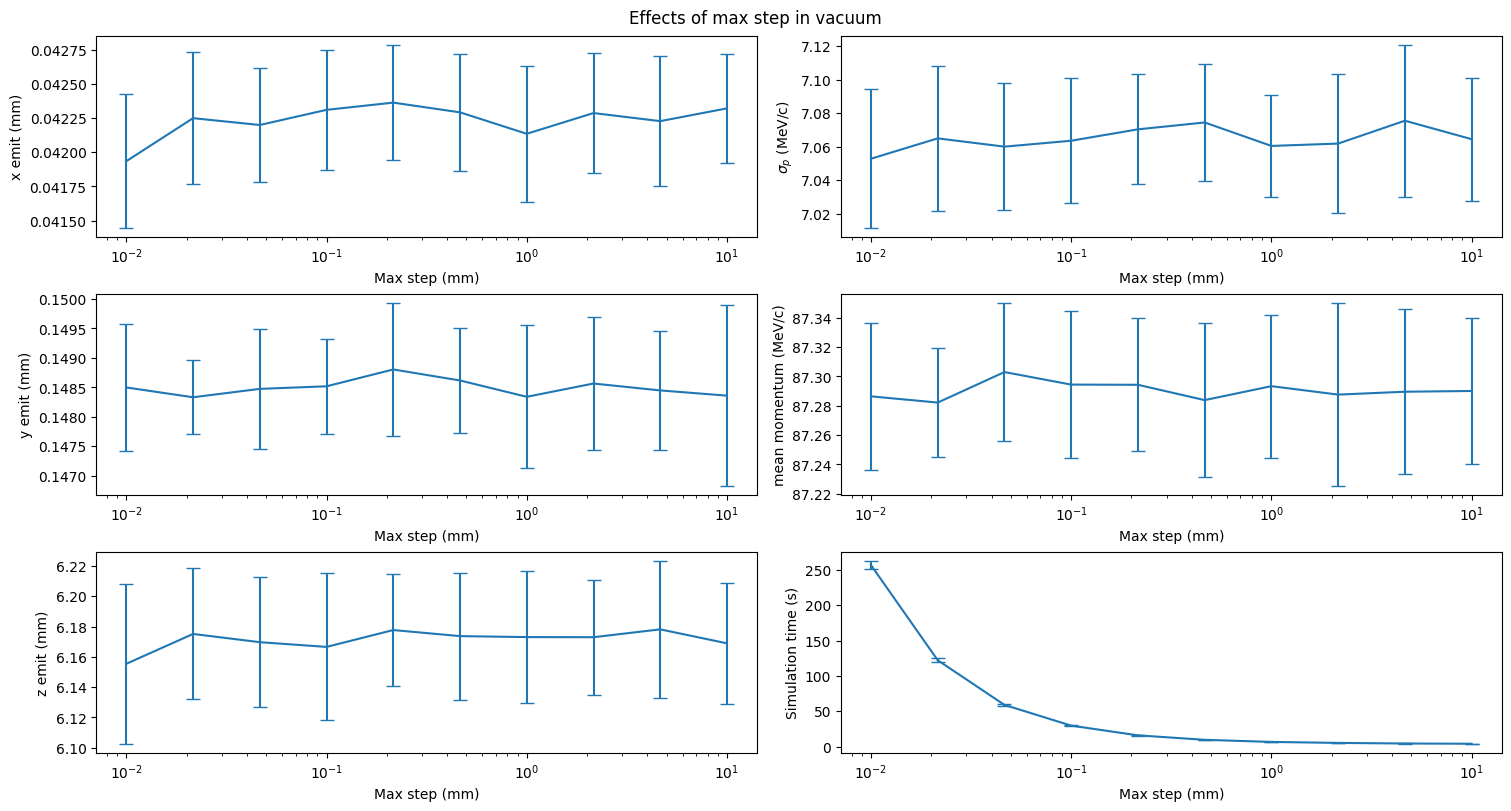

In [6]:
# Variables for the graphs
x_name = "Max step (mm)"
x_range = maxStepRange

# Produce graphs
fig, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(nrows=3, ncols=2, layout="constrained")
fig.set_size_inches(15, 8)
ax1.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[0], results_emittances, is_map=True)), capsize=5)
ax1.set_xlabel(x_name)
ax1.set_ylabel(r"x emit (mm)")
ax1.set_xscale("log")

ax2.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[1], results_emittances, is_map=True)), capsize=5)
ax2.set_xlabel(x_name)
ax2.set_ylabel(r"y emit (mm)")
ax2.set_xscale("log")

ax3.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[2], results_emittances, is_map=True)), capsize=5)
ax3.set_xlabel(x_name)
ax3.set_ylabel(r"z emit (mm)")
ax3.set_xscale("log")

ax4.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: np.std(p_total(x)), results_cut, is_map=True)), capsize=5)
ax4.set_xlabel(x_name)
ax4.set_ylabel(r"$\sigma_p$ (MeV/c)")
ax4.set_xscale("log")

ax5.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: np.mean(p_total(x)), results_cut, is_map=True)), capsize=5)
ax5.set_xlabel(x_name)
ax5.set_ylabel(r"mean momentum (MeV/c)")
ax5.set_xscale("log")

ax6.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[1], results)), capsize=5)
ax6.set_xlabel(x_name)
ax6.set_ylabel(r"Simulation time (s)")
ax6.set_xscale("log")

fig.suptitle("Effects of max step in vacuum")

# Max Step in Wedge

In [6]:
# Load file and apply processing.
with lzma.open("results/accuracy_wedgeStep.pkl.lzma", "rb") as file:
    results = pickle.load(file)

results_cut = map_dict(lambda x: cut_outliers(x[0]), data_to_map(results))
results_emittances = map_dict(lambda x: emittances(x), results_cut)

Text(0.5, 0.98, 'Effects of max step in wedge')

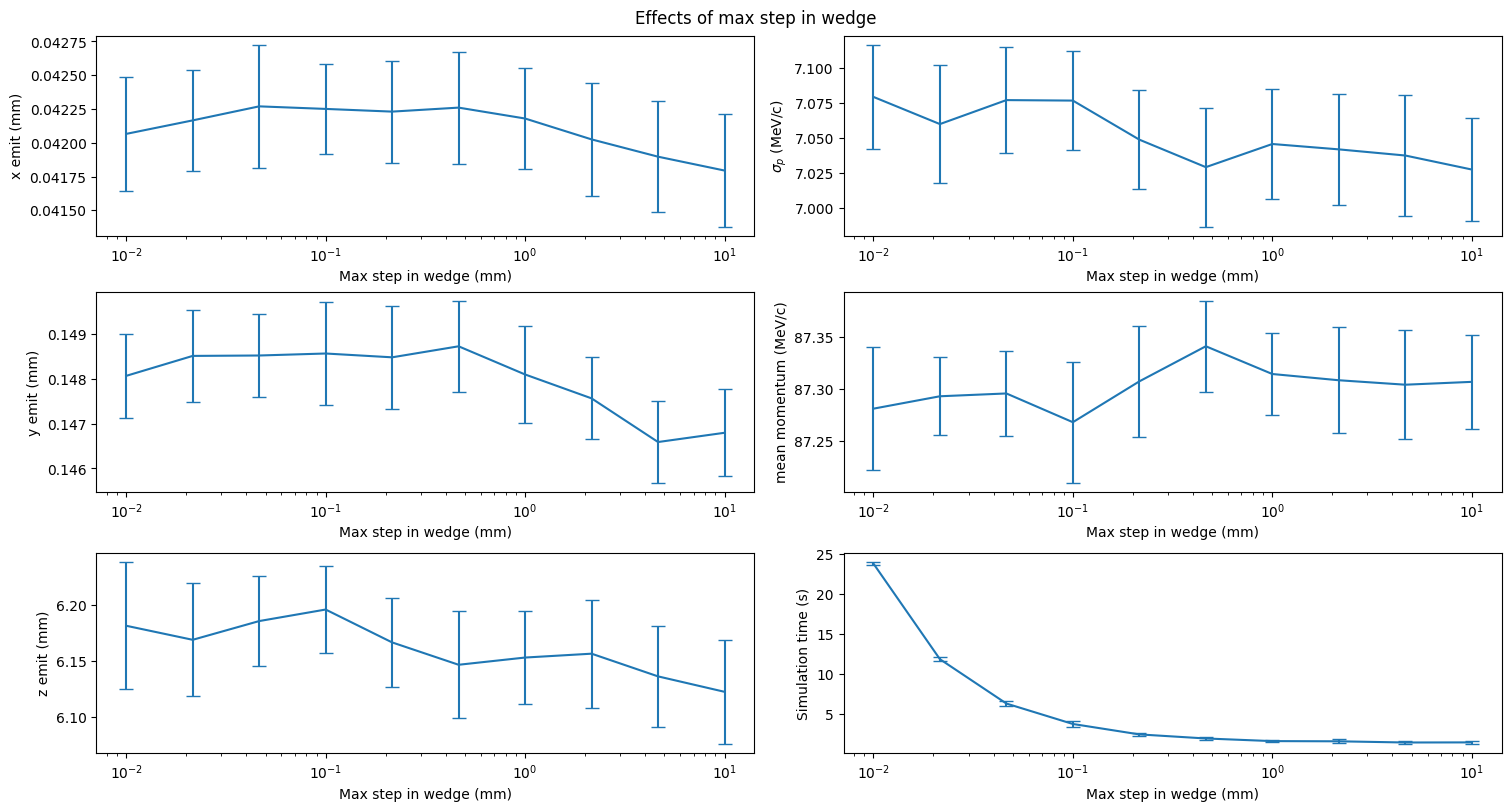

In [7]:
# Variables for the graphs
x_name = "Max step in wedge (mm)"
x_range = wedgeStepRange

# Produce graphs
fig, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(nrows=3, ncols=2, layout="constrained")
fig.set_size_inches(15, 8)
ax1.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[0], results_emittances, is_map=True)), capsize=5)
ax1.set_xlabel(x_name)
ax1.set_ylabel(r"x emit (mm)")
ax1.set_xscale("log")

ax2.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[1], results_emittances, is_map=True)), capsize=5)
ax2.set_xlabel(x_name)
ax2.set_ylabel(r"y emit (mm)")
ax2.set_xscale("log")

ax3.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[2], results_emittances, is_map=True)), capsize=5)
ax3.set_xlabel(x_name)
ax3.set_ylabel(r"z emit (mm)")
ax3.set_xscale("log")

ax4.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: np.std(p_total(x)), results_cut, is_map=True)), capsize=5)
ax4.set_xlabel(x_name)
ax4.set_ylabel(r"$\sigma_p$ (MeV/c)")
ax4.set_xscale("log")

ax5.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: np.mean(p_total(x)), results_cut, is_map=True)), capsize=5)
ax5.set_xlabel(x_name)
ax5.set_ylabel(r"mean momentum (MeV/c)")
ax5.set_xscale("log")

ax6.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[1], results)), capsize=5)
ax6.set_xlabel(x_name)
ax6.set_ylabel(r"Simulation time (s)")
ax6.set_xscale("log")

fig.suptitle("Effects of max step in wedge")

# Optimization with increasing particle count

In [3]:
# Load file
with lzma.open("results/accuracy_optim_particleCount.pkl.lzma", "rb") as file:
    results = pickle.load(file)

In [6]:
calc_quantity(lambda x: x[2], results)

{(10000,): (0.041643575942040205, 0.001169814219714821),
 (100000,): (0.04192660257194723, 6.667618682027615e-06)}

Text(0.5, 0.98, 'Effects of max step in wedge')

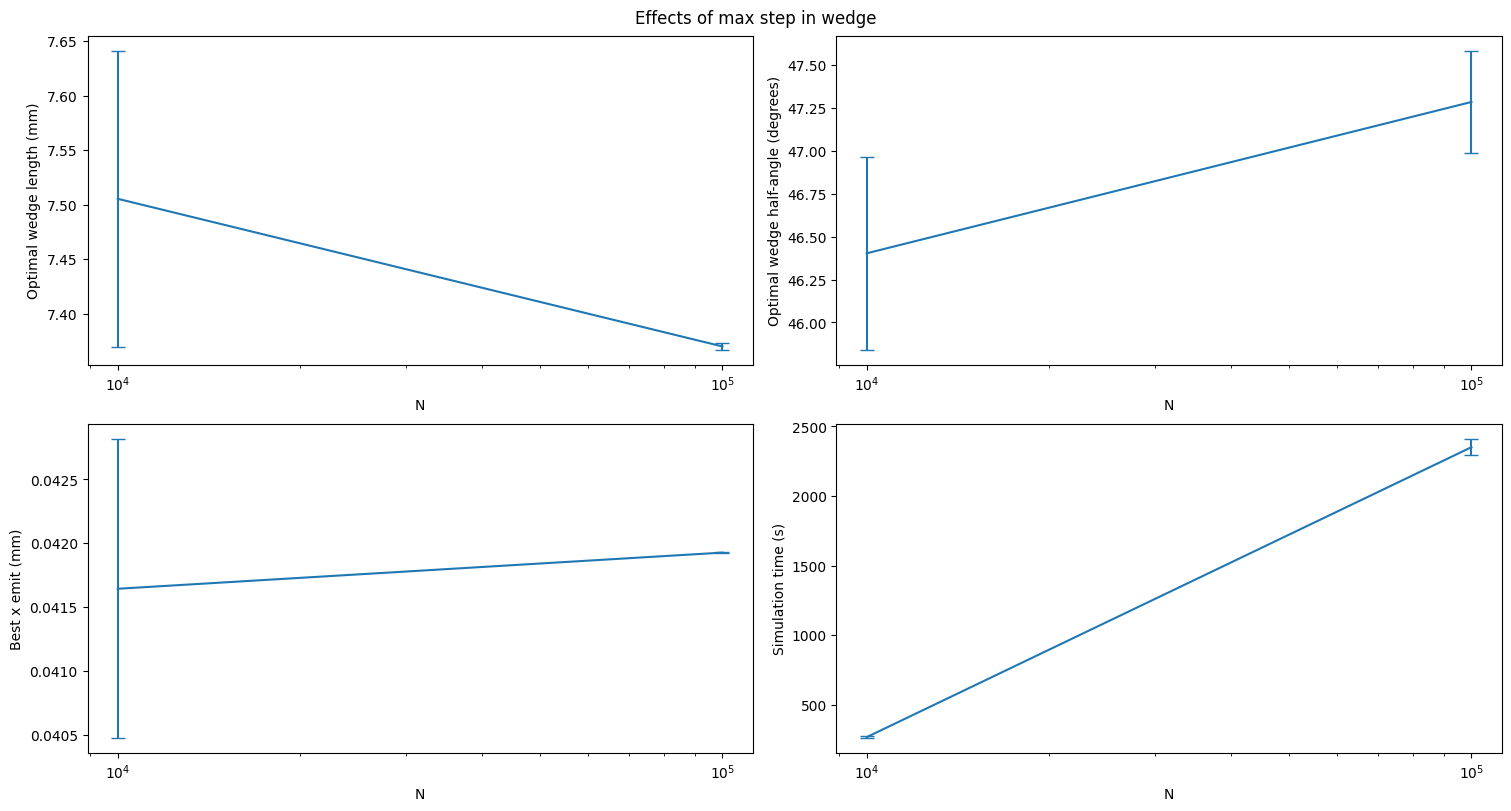

In [4]:
# Variables for the graphs
x_name = "N"
x_range = particleCountOptimRange

# Produce graphs
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, layout="constrained")
fig.set_size_inches(15, 8)
ax1.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[0].x[0], results)), capsize=5)
ax1.set_xlabel(x_name)
ax1.set_ylabel(r"Optimal wedge length (mm)")
ax1.set_xscale("log")

ax2.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[0].x[1], results)), capsize=5)
ax2.set_xlabel(x_name)
ax2.set_ylabel(r"Optimal wedge half-angle (degrees)")
ax2.set_xscale("log")

ax3.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[0].fun, results)), capsize=5)
ax3.set_xlabel(x_name)
ax3.set_ylabel(r"Best x emit (mm)")
ax3.set_xscale("log")

ax4.errorbar(*qmap_to_arrays(x_range, calc_quantity(lambda x: x[1], results)), capsize=5)
ax4.set_xlabel(x_name)
ax4.set_ylabel(r"Simulation time (s)")
ax4.set_xscale("log")

fig.suptitle("Effects of max step in wedge")